# Dataset splitting
# Dataset preparation and preprocessing
# Modeling
# Model deployment

## Library Importing 

In [1]:
# Tools for manipulating and visualizing Data  
import pandas as pd # Microsoft Excel 
import numpy as np  # Array
import matplotlib.pyplot as plt # Graph banay 
import seaborn as sns # Graph banay 


# Model (Algorithm)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

sns.set()

## Dataset import

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Checking Null Values

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.shape

(891, 12)

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
test.shape

(418, 11)

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
test_idx = test['PassengerId']

In [10]:
def bar_chart(feature):
    survived = train[train.Survived == 1][feature].value_counts()
    dead = train[train.Survived == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True,figsize = (10,5))

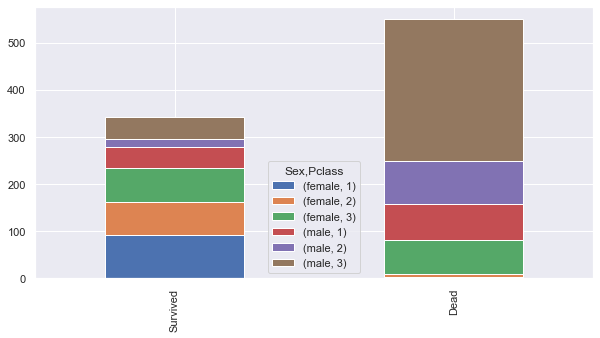

In [11]:
bar_chart(['Sex','Pclass'])

In [12]:
def barh_chart(features):
    survived = train[train.Survived == 1][features].value_counts()
    dead = train[train.Survived == 0][features].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'barh', stacked = True, figsize=(16,6))

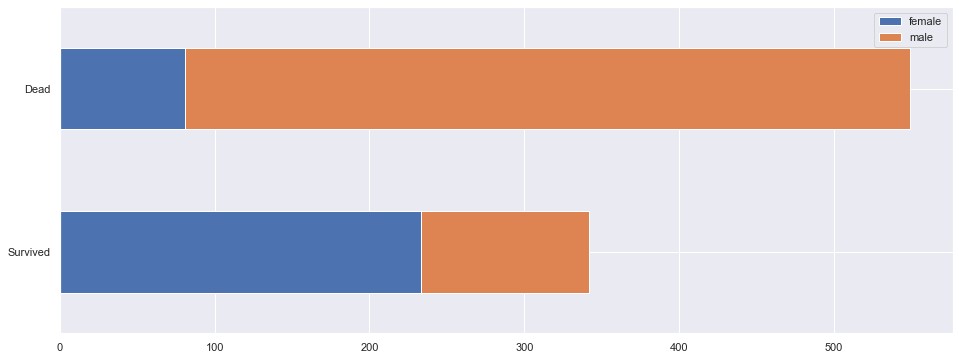

In [13]:
barh_chart('Sex')

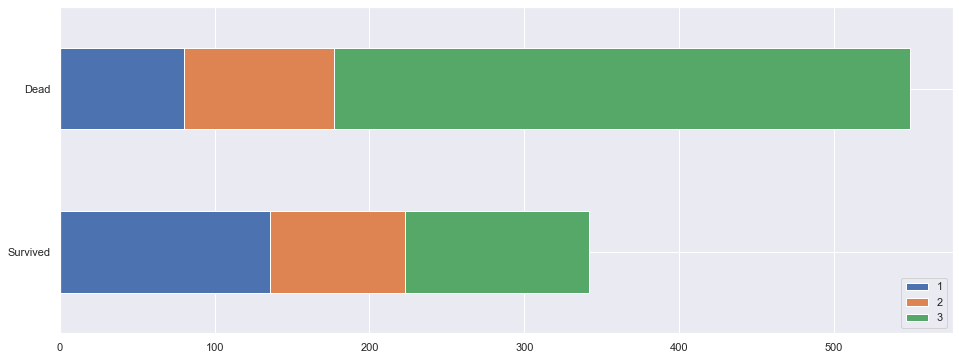

In [14]:
barh_chart('Pclass')

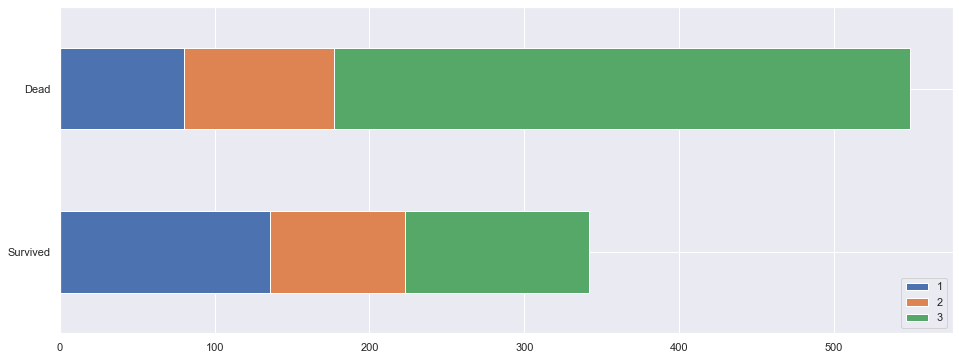

In [15]:
barh_chart('Pclass')

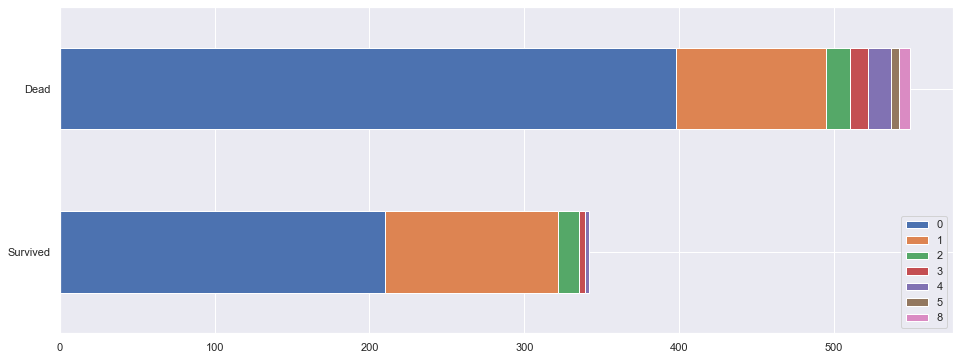

In [16]:
barh_chart('SibSp')

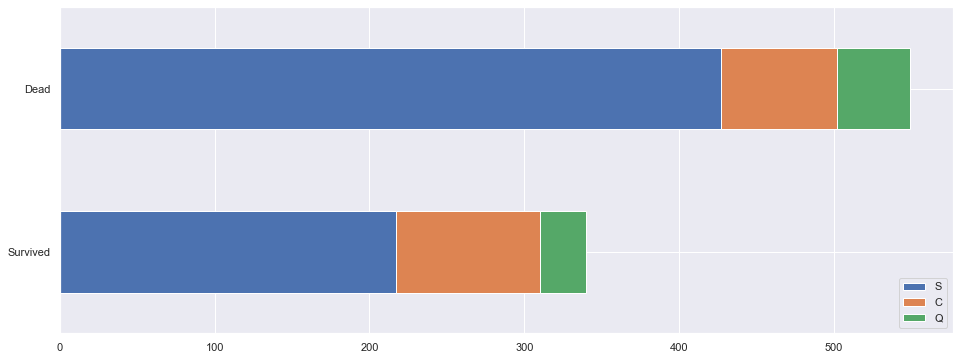

In [17]:
barh_chart('Embarked')

In [18]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(r'([A-Za-z]+)\.', expand = False)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
train.Title.value_counts().sort_values(ascending = False)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Sir           1
Lady          1
Mme           1
Countess      1
Capt          1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

In [21]:
test.Title.value_counts().sort_values(ascending = False)

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [22]:
title_encoder = {'Mr':0,'Master':0,'Rev':0,'Major':0,'Col':0,'Mlle':0,'Capt':0,'Sir':0,'Don':0,'Dr':0,'Miss':1,'Ms':1,'Mr':2,'Mrs':3,'Mme':3,'Countess':3,'Lady':3,'Jonkheer':3,'Dona':3}

In [23]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_encoder)
    

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [25]:
for dataset in train_test_data:
    dataset.drop(['Name','PassengerId'],axis = 1, inplace =True)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [27]:
gender_encoder = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(gender_encoder)

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,2


In [29]:
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'),inplace = True )

In [30]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [31]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [32]:
for dataset in train_test_data:
    dataset['Embarked'].fillna('S',inplace = True )

In [33]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str.extract(r'([A-Z])\d', expand = False)

In [34]:
train['Cabin'].value_counts()

C    59
B    47
E    33
D    30
A    15
F     9
G     7
Name: Cabin, dtype: int64

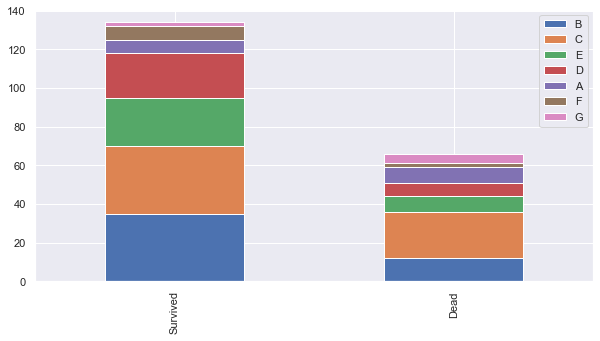

In [35]:
bar_chart('Cabin')

<AxesSubplot:>

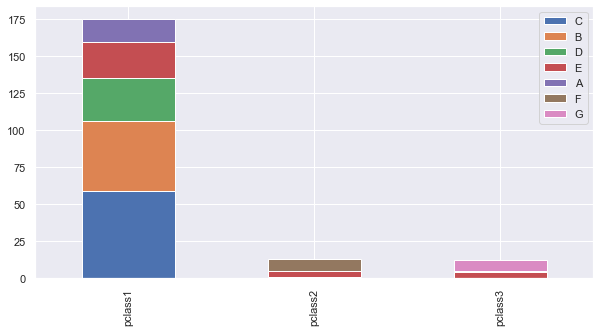

In [36]:
pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index = ['pclass1','pclass2','pclass3']
df.plot(kind = 'bar', stacked = True, figsize=(10,5))

In [37]:
radio = train.groupby('Pclass').Cabin.value_counts()

In [38]:
radio

Pclass  Cabin
1       C        59
        B        47
        D        29
        E        25
        A        15
2       F         8
        E         4
        D         1
3       G         7
        E         4
        F         1
Name: Cabin, dtype: int64

In [39]:
cabin_encoder = {'A':0,'B':0,'C':0,'D':0.96,'E':1.80, 'F':2.88, 'G':3.25}
for dataset in train_test_data:
    dataset.Cabin = dataset.Cabin.map(cabin_encoder)

In [40]:
for dataset in train_test_data:
    dataset.Cabin.fillna(dataset.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,3.25,S,2
1,1,1,1,38.0,1,0,PC 17599,71.2833,0.00,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,3.25,S,1
3,1,1,1,35.0,1,0,113803,53.1000,0.00,S,3
4,0,3,0,35.0,0,0,373450,8.0500,3.25,S,2


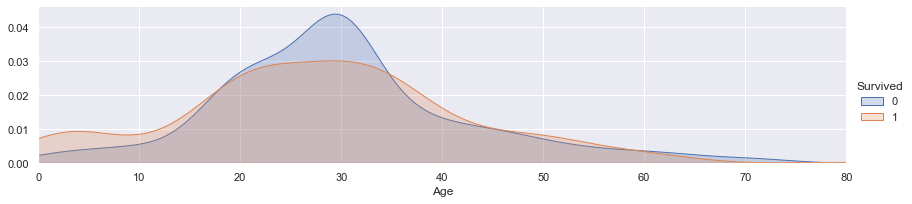

In [42]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

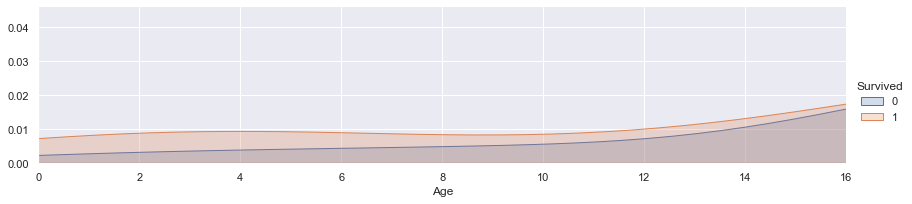

In [43]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0,16))
facet.add_legend()
plt.show()

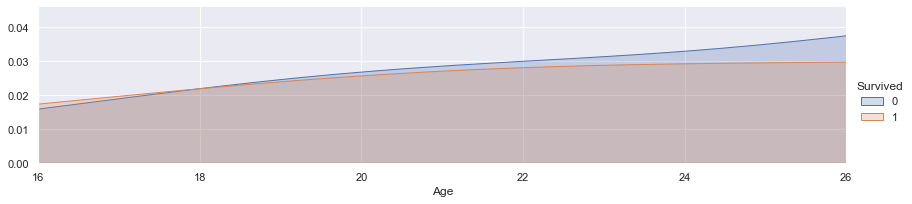

In [44]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(16,26))
facet.add_legend()
plt.show()

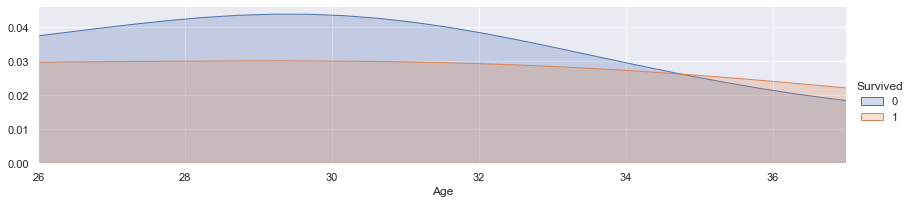

In [45]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(26,37))
facet.add_legend()
plt.show()

In [46]:
def age_encoder(age):
    if 0 <= age and age <= 16: return 0
    elif 16<age and age <= 26: return 1
    elif 26<age and age <= 37: return 3
    else: return 4

for dataset in train_test_data:
    dataset.Age = dataset.Age.map(age_encoder)

In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,A/5 21171,7.2500,3.25,S,2
1,1,1,1,4,1,0,PC 17599,71.2833,0.00,C,3
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,3.25,S,1
3,1,1,1,3,1,0,113803,53.1000,0.00,S,3
4,0,3,0,3,0,0,373450,8.0500,3.25,S,2


In [48]:
for dataset in train_test_data:
    dataset.drop('Ticket', axis = 'columns', inplace = True)

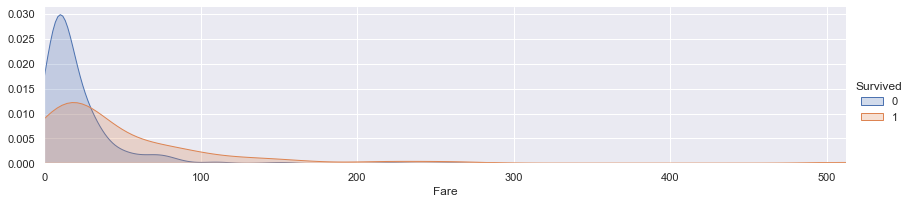

In [49]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

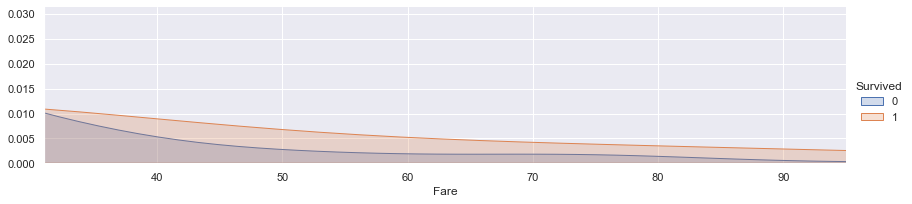

In [50]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim=(31,95))
facet.add_legend()
plt.show()

In [51]:
def fare_encoder(f):
    if 0<=f and f <= 30: return 0
    elif 30<f and f<=95: return 1
    else: return 2

for dataset in train_test_data:
    dataset.Fare = dataset.Fare.map(fare_encoder)

In [52]:
for dataset in train_test_data:
    dataset['FamilySize'] = train['SibSp'] + train['Parch'] + 1

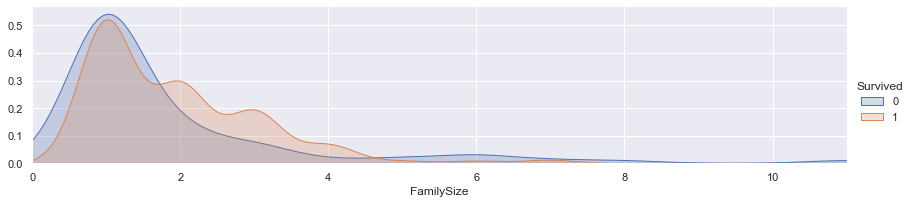

In [53]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.show()

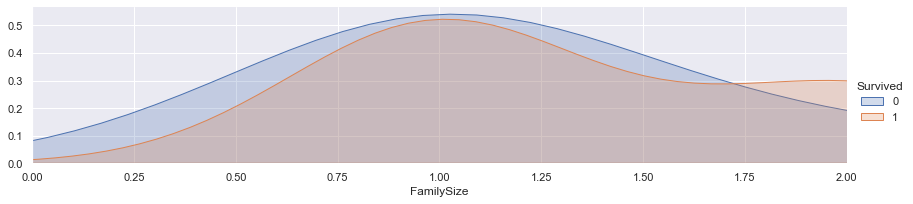

In [54]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(0,2))
facet.add_legend()
plt.show()

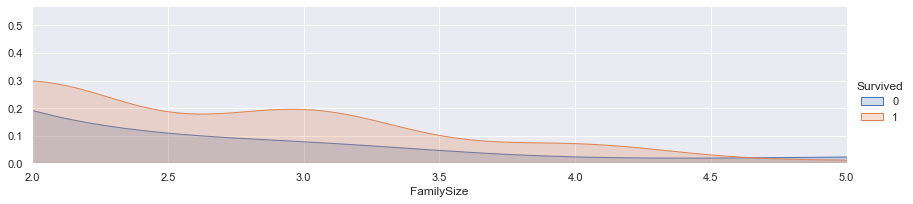

In [55]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(2,5))
facet.add_legend()
plt.show()

In [56]:
def family_encoder(f):
    if 0 <= f and f <= 2: return 1
    elif 2 < f and f <= 5: return 2
    else: return 3

for dataset in train_test_data:
    dataset.FamilySize = dataset.FamilySize.map(family_encoder)

In [57]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,1,0,0,3.25,S,2,1
1,1,1,1,4,1,0,1,0.00,C,3,1
2,1,3,1,1,0,0,0,3.25,S,1,1
3,1,1,1,3,1,0,1,0.00,S,3,1
4,0,3,0,3,0,0,0,3.25,S,2,1


In [58]:
for dataset in train_test_data:
    dataset.drop(['SibSp','Parch'], axis = 'columns', inplace = True)

In [59]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,0,3.25,S,2,1
1,1,1,1,4,1,0.00,C,3,1
2,1,3,1,1,0,3.25,S,1,1
3,1,1,1,3,1,0.00,S,3,1
4,0,3,0,3,0,3.25,S,2,1


In [60]:
X = train.drop('Survived', axis = 'columns')
y = train["Survived"]

In [61]:
test.drop(['Embarked','Title'], axis = 1, inplace = True)
test.head()
#train.head()

,Pclass,Sex,Age,Fare,Cabin,FamilySize
0,3,0,3,0,2.525,1
1,3,1,4,0,2.525,1
2,2,0,4,0,2.880,1
3,3,0,3,0,2.525,1
4,3,1,1,0,2.525,1


In [62]:
train.drop(['Embarked','Title'], axis = 1, inplace = True)
X = train.drop('Survived', axis = 'columns')
y = train["Survived"]

model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [63]:
pred = model.predict(test)

In [64]:
pd.DataFrame(pred).head()

,0
0,0
1,0
2,0
3,0
4,1
